# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data=pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

## Handle null values

In [4]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

# Data Visualization

In [59]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ipython-input-61-ec0bd9cbba4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


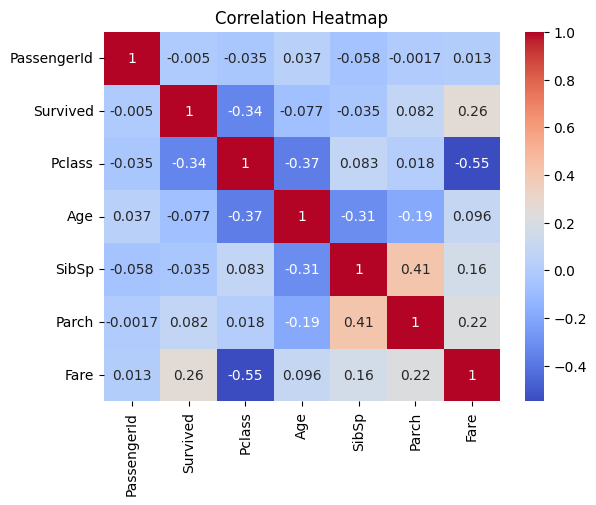

In [61]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

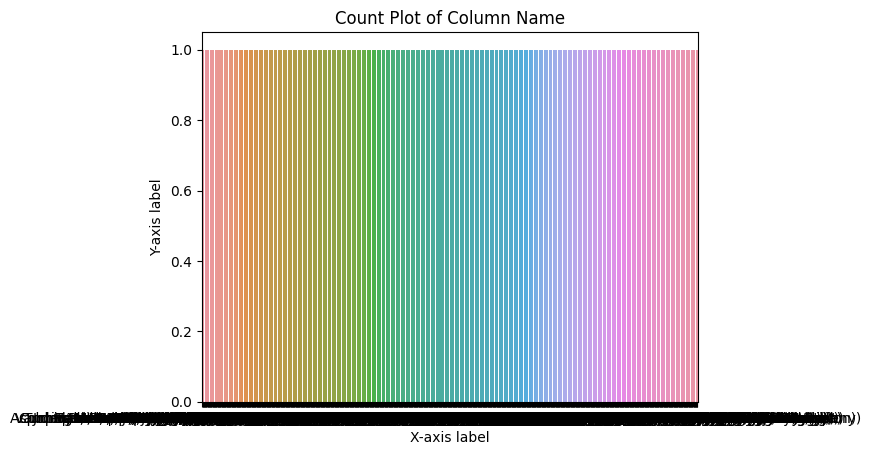

In [68]:
sns.countplot(x='Name', data=data)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Count Plot of Column Name')
plt.show()

# Outliers Detection

<Axes: >

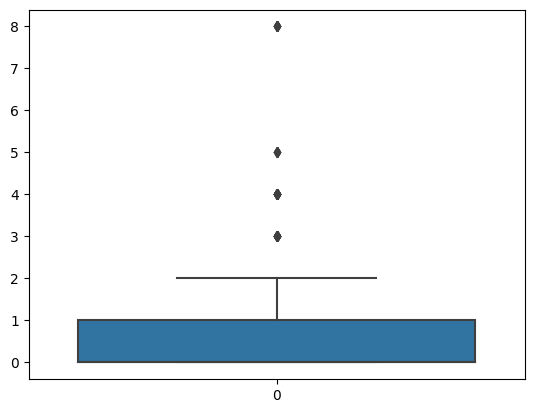

In [41]:
sns.boxplot(data.SibSp)

# Seperation of Dependent and Independent values

In [13]:
A=data.iloc[:,:1]

In [14]:
A

,PassengerId
0,1
1,2
2,3
3,4
4,5
...,...
886,887
887,888
888,889
889,890


In [10]:
B=data.iloc[:,1:] # last coloumn

In [25]:
B.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.shape

(891, 12)

In [27]:
A.shape

(891, 1)

In [28]:
B.shape

(891, 11)

# Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
a_train,a_test,b_train,b_test=train_test_split(A,B,test_size=0.2,random_state=0)

In [18]:
a_train

,PassengerId
140,141
439,440
817,818
378,379
491,492
...,...
835,836
192,193
629,630
559,560


In [20]:
print(a_train.shape)
print(a_train.shape)
print(b_train.shape)
print(b_test.shape)

(712, 1)
(712, 1)
(712, 11)
(179, 11)


In [51]:
from colorsys import yiq_to_rgb
x=[1,2,34,4,5,6]
y=[2,1,0,9,3,2]
for i in range(6):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)
print("with random state",a_test)

with random state [34, 4, 1]


In [52]:
x=[1,2,34,4,5,6]
y=[2,1,0,9,3,2]
for i in range(6):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
print("with random state",a_train)

with random state [5, 2, 6]


# Encoding

In [29]:
# Label encoding on a particular coloumn
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
A["PassengerId"]=le.fit_transform(A["PassengerId"])

In [32]:
A["PassengerId"]

0        0
1        1
2        2
3        3
4        4
      ... 
886    886
887    887
888    888
889    889
890    890
Name: PassengerId, Length: 891, dtype: int64

In [33]:
A.head()

,PassengerId
0,0
1,1
2,2
3,3
4,4


In [35]:
# one hot encoding
A.shape

(891, 1)

In [36]:
PassengerId=pd.get_dummies(A["PassengerId"],drop_first=True)

In [37]:
PassengerId

,1,2,3,4,5,6,7,8,9,10,...,881,882,883,884,885,886,887,888,889,890
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
A=pd.concat([A,PassengerId],axis=1)

In [40]:
A.head()

,PassengerId,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [56]:
a_train = np.array(a_train).reshape(-1, 1)
a_test = np.array(a_test).reshape(-1, 1)

In [57]:
a_train

array([[5],
       [2],
       [6]])

In [58]:
a_test

array([[34],
       [ 4],
       [ 1]])